# Sunspot numbers

Source: WDC-SILSO, Royal Observatory of Belgium, Brussels
SILSO data is under CC BY-NC4.0 license

https://www.sidc.be/SILSO/infosnmtot
Filename: SN_m_tot_V2.0.csv
Format: Comma Separated values (adapted for import in spreadsheets)
The separator is the semicolon ';'.

Contents:
Column 1-2: Gregorian calendar date
- Year
- Month
Column 3: Date in fraction of year.
Column 4: Monthly mean total sunspot number.
Column 5: Monthly mean standard deviation of the input sunspot numbers.
Column 6: Number of observations used to compute the monthly mean total sunspot number.
Column 7: Definitive/provisional marker. '1' indicates that the value is definitive. '0' indicates that the value is still provisional.

In [1]:
import urllib.request
import pandas as pd
# Monthly mean total sunspot number [1/1749 - now]
url = "https://www.sidc.be/SILSO/INFO/snmtotcsv.php"
data_file = "sunspots.csv"
urllib.request.urlretrieve(url, data_file)

('sunspots.csv', <http.client.HTTPMessage at 0x7fee8ee8fe10>)

In [2]:
columns = ['year', 'month', 'date', 'ssn', 'stddev', 'numobs', 'definitive']  # list with column names
df = pd.read_table(data_file, comment="#", sep=";", header=0, names=columns)
df.index = df['date']

        max        mean    min
year                          
1749  264.3  138.345455   92.8
1750  171.7  139.000000  105.5
1751  116.7   79.441667   38.7
1752  130.7   79.666667   45.2
1753   76.2   51.125000   11.2
...     ...         ...    ...
2019    9.9    3.583333    0.4
2020   34.5    8.791667    0.2
2021   67.5   29.483333    8.2
2022  112.8   83.033333   55.3
2023  160.5  125.083333   97.6

[275 rows x 3 columns]


<AxesSubplot: xlabel='year'>

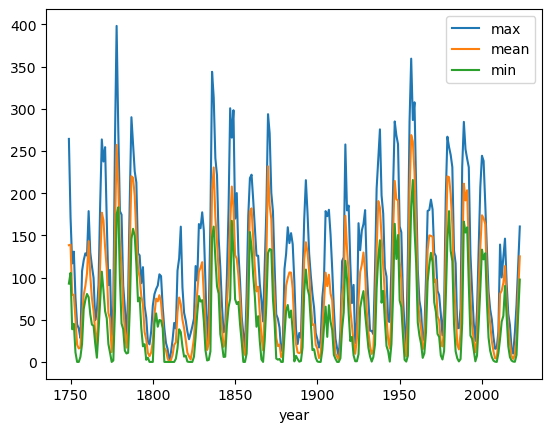

In [3]:
# monthly max, mean and min sunspot numbers since 1749
stats = df.pivot_table(index='year', values='ssn', aggfunc=('mean', 'max', 'min'))
print(stats)
stats.plot()

<AxesSubplot: xlabel='date'>

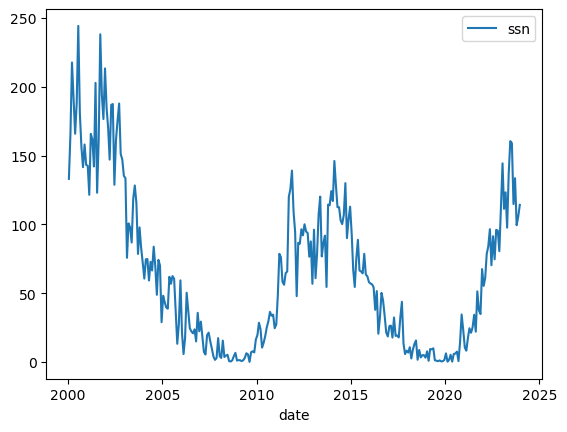

In [4]:
# sunspot numbers since 2000
y2k = df[df['year'] >= 2000]
y2k.plot(y='ssn')

<AxesSubplot: >

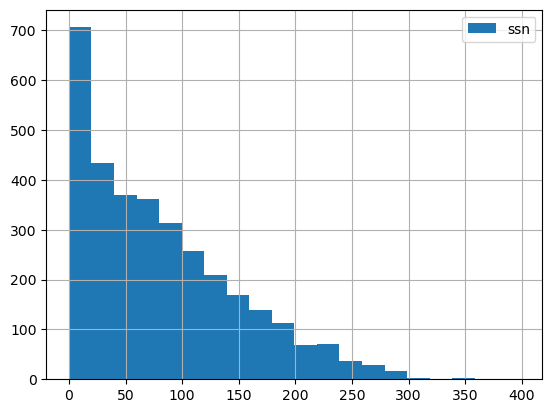

In [5]:
# histogram of sunspot numbers
df['ssn'].hist(legend='true', bins=20)

<AxesSubplot: >

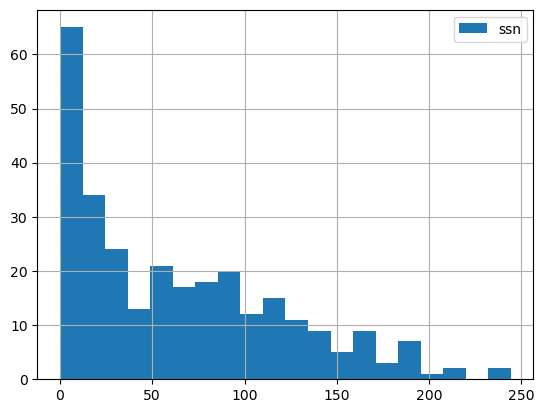

In [6]:
# histogram of sunspot numbers since 2000
y2k['ssn'].hist(legend='true', bins=20)

In [7]:
# how many months had no sunspots
print(df.ssn[df.ssn==0].count(), "months without sunspots")
for year in range(1749, 2024):
    d2 = df[df.year==year]
    count = d2.ssn[d2.ssn==0].count()
    if count > 0:
        print(year, count)

67 months without sunspots
1754 1
1755 2
1775 1
1798 3
1799 2
1800 1
1807 1
1808 2
1809 3
1810 12
1811 7
1812 1
1813 1
1822 4
1823 9
1824 4
1855 1
1856 1
1867 1
1878 1
1879 1
1901 2
1902 2
1912 1
1913 2
2009 1
